# Face Mask Detection using Convolutional Neural Network (CNN)

This project implements a  learning model to detect whether a person is wearing a face mask or not using image classification techniques.

## Dataset Selection

**Dataset:** Face Mask Detection Dataset

**Dataset Link:** https://www.kaggle.com/datasets/andrewmvd/face-mask-detection

**Description:** This dataset contains images of people with and without face masks. The images are divided into two classes:
- `with_mask`: Images of people wearing face masks
- `without_mask`: Images of people not wearing face masks

This binary classification task is crucial for automated face mask detection systems in public spaces.

## Data Collection & Overview

**Objective:** Load the dataset, explore its structure, and understand the distribution of classes.

We will:
1. Import necessary libraries for data processing, visualization, and deep learning
2. Load image file paths from both classes
3. Count the number of images in each class
4. Visualize the class distribution to check for imbalance

### Importing Required Libraries

We import all necessary libraries at the beginning for better code organization:
- **os**: For file and directory operations
- **numpy**: For numerical computations and array operations
- **matplotlib**: For data visualization
- **cv2 (OpenCV)**: For image processing
- **PIL**: For image loading and manipulation
- **sklearn**: For train-test splitting
- **tensorflow/keras**: For building the CNN model
- **seaborn**: For advanced visualizations

In [4]:
# Data manipulation and processing
import os
import numpy as np
from PIL import Image

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Image processing
import cv2

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Deep Learning
import tensorflow as tf
from tensorflow import keras

### Loading Dataset File Paths

Loading the image filenames from both directories to understand the dataset structure.

In [5]:
with_mask_files = os.listdir('../DataSet/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['473.png', '521.png', '351.png', '799.png', '533.png']
['864.png', '411.png', '613.png', '326.png', '439.png']


In [6]:
without_mask_files = os.listdir('../DataSet/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['473.png', '521.png', '351.png', '799.png', '533.png']
['864.png', '411.png', '613.png', '326.png', '439.png']


In [7]:
mask_images_no = len(with_mask_files)
print('number of mask images:', mask_images_no)
without_mask_images = len(without_mask_files)
print('number of without mask images:', without_mask_images)

number of mask images: 1012
number of without mask images: 932


### Visualizing Class Distribution

Creating a bar chart to visualize the distribution of images across both classes. This helps identify any class imbalance that might affect model training.

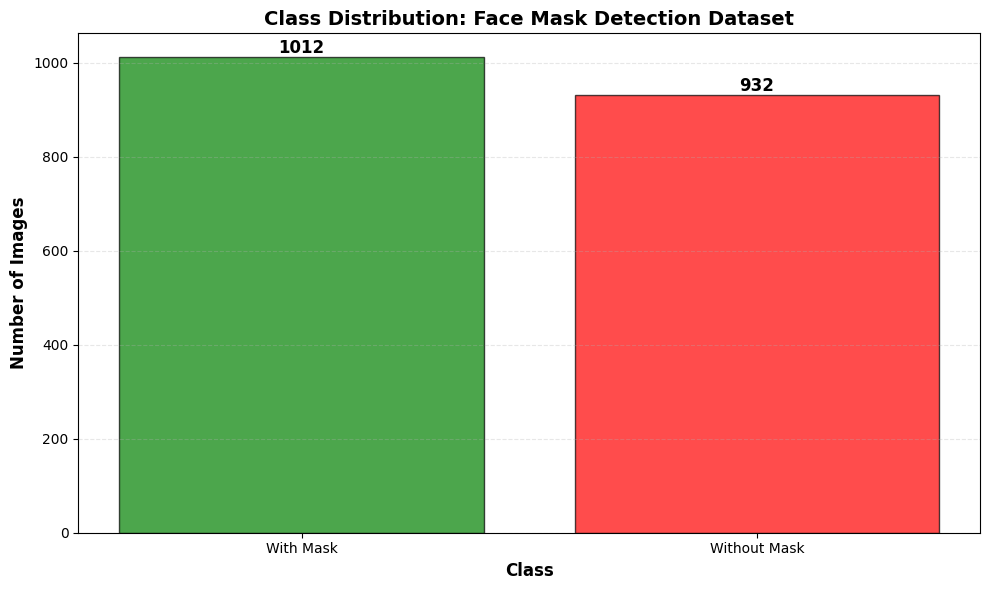

Dataset Summary:
Total Images: 1944
With Mask: 1012 (52.06%)
Without Mask: 932 (47.94%)


In [8]:
# Create a bar chart showing class distribution
classes = ['With Mask', 'Without Mask']
counts = [mask_images_no, without_mask_images]

plt.figure(figsize=(10, 6))
bars = plt.bar(classes, counts, color=['green', 'red'], alpha=0.7, edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Class', fontsize=12, fontweight='bold')
plt.ylabel('Number of Images', fontsize=12, fontweight='bold')
plt.title('Class Distribution: Face Mask Detection Dataset', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Print summary statistics
total_images = mask_images_no + without_mask_images
print(f"Dataset Summary:")
print(f"Total Images: {total_images}")
print(f"With Mask: {mask_images_no} ({mask_images_no/total_images*100:.2f}%)")
print(f"Without Mask: {without_mask_images} ({without_mask_images/total_images*100:.2f}%)")

### Creating Labels for Classification

Assigning numerical labels to each class for the classification task:
- **With mask → 1** (Positive class)
- **Without mask → 0** (Negative class)

These labels will be used as target values during model training.

In [9]:
# create the labels

with_mask_label = [1]*mask_images_no
without_mask_label = [0]*without_mask_images

print(with_mask_label[0:5])

print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:
print('number of mask images labels:', len(with_mask_label))
print("Witout mask lebels:",len(without_mask_label))

number of mask images labels: 1012
Witout mask lebels: 932


In [11]:
labels = with_mask_label + without_mask_label

print("Total Labels: ",len(labels))
print(labels[0:5])
print(labels[-5:])

Total Labels:  1944
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## Data Cleaning & Preprocessing

**Objective:** Ensure data quality by checking for corrupted images and preparing images for model training.

Key steps:
1. Check for corrupted or unreadable images
2. Resize all images to a uniform size (128x128 pixels)
3. Convert images to RGB format for consistency
4. Normalize pixel values to the range [0, 1]

### Checking for Corrupted Images

Before processing, we check if all images can be opened and read properly. This prevents errors during training.

In [12]:
# Check for corrupted images
corrupted_images = []

print("Checking for corrupted images in 'with_mask' folder...")
with_mask_path = '../DataSet/with_mask/'
for img_file in with_mask_files:
    try:
        img = Image.open(with_mask_path + img_file)
        img.verify()  # Verify that it is an image
    except Exception as e:
        corrupted_images.append(('with_mask', img_file))
        print(f"Corrupted: {img_file} - {e}")

print("\nChecking for corrupted images in 'without_mask' folder...")
without_mask_path = '../DataSet/without_mask/'
for img_file in without_mask_files:
    try:
        img = Image.open(without_mask_path + img_file)
        img.verify()  # Verify that it is an image
    except Exception as e:
        corrupted_images.append(('without_mask', img_file))
        print(f"Corrupted: {img_file} - {e}")

# Summary
if len(corrupted_images) == 0:
    print("\n✓ All images are valid and readable!")
else:
    print(f"\n✗ Found {len(corrupted_images)} corrupted image(s):")
    for folder, filename in corrupted_images:
        print(f"  - {folder}/{filename}")

Checking for corrupted images in 'with_mask' folder...



Checking for corrupted images in 'without_mask' folder...

✓ All images are valid and readable!


## Exploratory Data Analysis (EDA)

**Objective:** Understand the characteristics of our image data through statistical analysis and visualization.

We will:
1. Display sample images from both classes
2. Analyze image dimensions and properties
3. Visualize multiple samples to understand data variability

### Sample Image Visualization

Displaying sample images from both classes to understand the visual characteristics of our data.

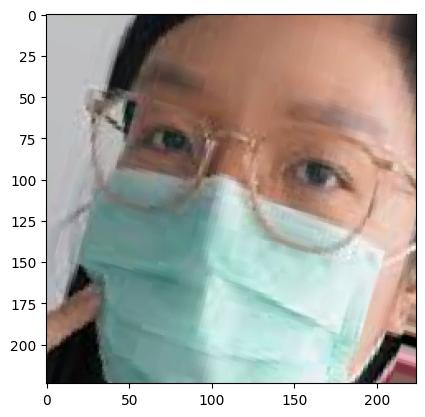

In [13]:
# displaying with mask image

img = mpimg.imread('../DataSet/with_mask/53.png')
imgplot  = plt.imshow(img)
plt.show()

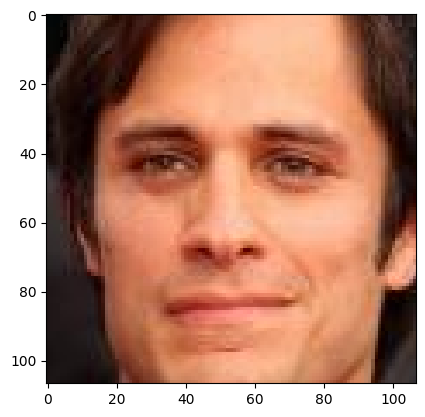

In [14]:
# displaying without mask image

img = mpimg.imread('../DataSet/without_mask/99.png')
imgplot  = plt.imshow(img)
plt.show()

### Displaying Multiple Samples

Visualizing multiple samples from each class to better understand data variability and quality.

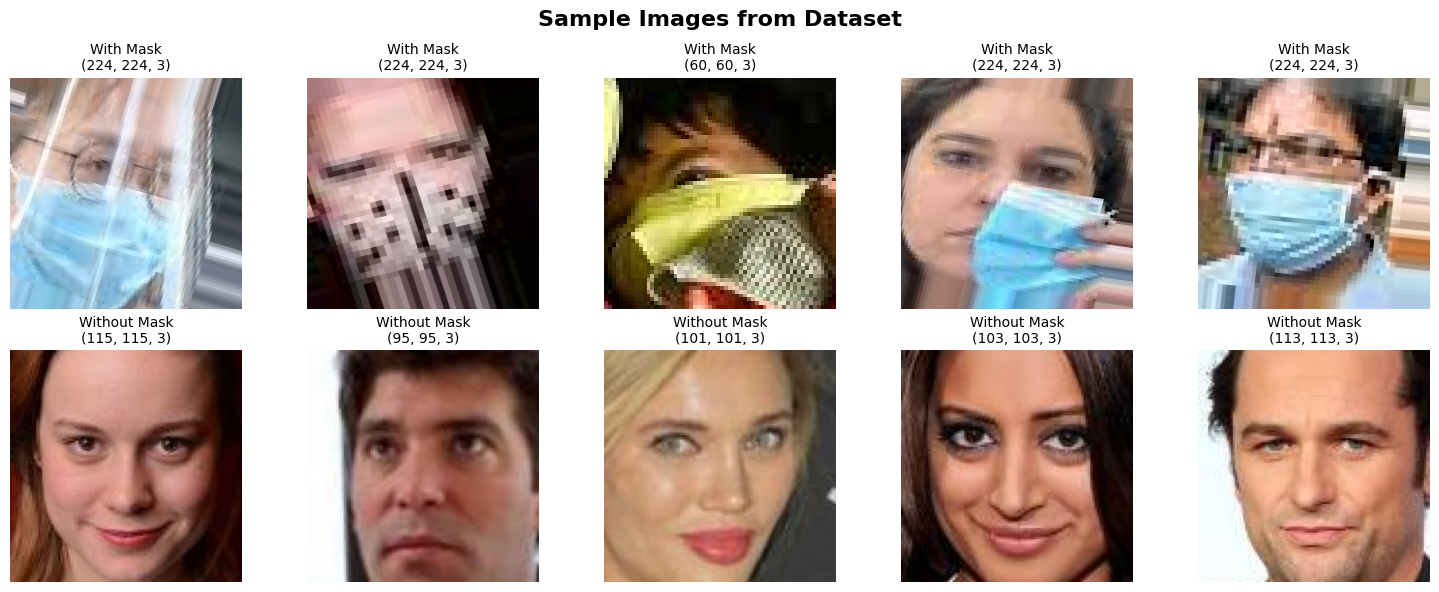

In [15]:
# Display multiple samples from both classes
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Sample Images from Dataset', fontsize=16, fontweight='bold')

# Display 5 samples with mask
for i in range(5):
    img = mpimg.imread(f'../DataSet/with_mask/{with_mask_files[i]}')
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'With Mask\n{img.shape}', fontsize=10)
    axes[0, i].axis('off')

# Display 5 samples without mask
for i in range(5):
    img = mpimg.imread(f'../DataSet/without_mask/{without_mask_files[i]}')
    axes[1, i].imshow(img)
    axes[1, i].set_title(f'Without Mask\n{img.shape}', fontsize=10)
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

### Statistical Summary of Images

Analyzing the dimensions and properties of raw images before preprocessing.

In [16]:
# Analyze image dimensions
image_shapes = []

# Sample 50 images from each class to analyze dimensions
sample_size = min(50, len(with_mask_files))

for i in range(sample_size):
    img = mpimg.imread(f'../DataSet/with_mask/{with_mask_files[i]}')
    image_shapes.append(img.shape)
    
for i in range(sample_size):
    img = mpimg.imread(f'../DataSet/without_mask/{without_mask_files[i]}')
    image_shapes.append(img.shape)

# Convert to numpy array for analysis
image_shapes = np.array(image_shapes)

print("IMAGE DIMENSION STATISTICS")
print(f"Sample size analyzed: {len(image_shapes)} images")
print(f"\nHeight statistics:")
print(f"  Mean: {np.mean(image_shapes[:, 0]):.2f} pixels")
print(f"  Min: {np.min(image_shapes[:, 0])} pixels")
print(f"  Max: {np.max(image_shapes[:, 0])} pixels")
print(f"\nWidth statistics:")
print(f"  Mean: {np.mean(image_shapes[:, 1]):.2f} pixels")
print(f"  Min: {np.min(image_shapes[:, 1])} pixels")
print(f"  Max: {np.max(image_shapes[:, 1])} pixels")
print(f"\nColor channels: {image_shapes[0, 2]} (RGB)")
print("\n✓ This variability in dimensions confirms the need for resizing \n all images to a uniform size (128x128) for model training.")

IMAGE DIMENSION STATISTICS
Sample size analyzed: 100 images

Height statistics:
  Mean: 148.49 pixels
  Min: 27 pixels
  Max: 224 pixels

Width statistics:
  Mean: 148.49 pixels
  Min: 27 pixels
  Max: 224 pixels

Color channels: 3 (RGB)

✓ This variability in dimensions confirms the need for resizing 
 all images to a uniform size (128x128) for model training.


##  Feature Engineering

**Objective:** Transform raw images into a format suitable for CNN training.

**Key transformations:**
1. **Resizing**: Convert all images to 128x128 pixels for uniform input shape
2. **RGB Conversion**: Ensure all images have 3 color channels (Red, Green, Blue)
3. **Array Conversion**: Convert PIL images to NumPy arrays for numerical processing
4. **Normalization**: Scale pixel values from [0, 255] to [0, 1] by dividing by 255

**Why normalize?** Neural networks converge faster and perform better when input features are scaled to similar ranges. Normalization prevents features with larger values from dominating the learning process.

### Image Preprocessing Pipeline

Loading, resizing, and converting images to NumPy arrays.

In [18]:
# convert images to numpy arrays

with_mask_path = '../DataSet/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '../DataSet/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
len(data)

1944

In [ ]:
type(data)

list

In [ ]:
data[0]

array([[[128, 101,  88],
        [128, 101,  87],
        [128, 100,  86],
        ...,
        [ 49,  57,  60],
        [ 53,  61,  64],
        [ 52,  61,  65]],

       [[127, 102,  90],
        [128, 102,  89],
        [128, 102,  89],
        ...,
        [ 51,  59,  62],
        [ 53,  61,  64],
        [ 52,  61,  65]],

       [[124, 102,  91],
        [125, 102,  90],
        [126, 102,  90],
        ...,
        [ 53,  61,  64],
        [ 52,  61,  65],
        [ 51,  61,  65]],

       ...,

       [[154, 200, 233],
        [151, 199, 232],
        [144, 196, 227],
        ...,
        [110, 117, 128],
        [115, 121, 133],
        [117, 123, 135]],

       [[154, 200, 233],
        [148, 197, 230],
        [145, 196, 228],
        ...,
        [101, 108, 121],
        [102, 109, 122],
        [104, 111, 124]],

       [[153, 199, 232],
        [146, 196, 228],
        [145, 197, 229],
        ...,
        [100, 106, 118],
        [101, 107, 119],
        [102, 108, 121]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[78].shape

(128, 128, 3)

In [ ]:
# converting images list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)

(1944, 128, 128, 3)


In [ ]:
print(Y.shape)

(1944,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


### Train-Test Split

Splitting the dataset into training (80%) and testing (20%) sets. The training set is used to train the model, while the testing set evaluates its performance on unseen data.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1944, 128, 128, 3) (1555, 128, 128, 3) (389, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

### Pixel Normalization (Scaling)

**Why normalize?** We divide all pixel values by 255 to scale them from the range [0, 255] to [0, 1]. This normalization:
- Helps the neural network converge faster during training
- Prevents gradient explosion/vanishing problems
- Makes the model more stable and improves generalization

In [ ]:
X_train[[0]]

array([[[[37, 36, 34],
         [40, 39, 37],
         [41, 40, 38],
         ...,
         [58, 50, 50],
         [57, 48, 49],
         [53, 44, 45]],

        [[37, 36, 34],
         [40, 39, 37],
         [40, 39, 37],
         ...,
         [58, 50, 50],
         [54, 44, 45],
         [51, 42, 43]],

        [[37, 36, 34],
         [40, 39, 37],
         [39, 38, 36],
         ...,
         [63, 55, 55],
         [55, 46, 47],
         [52, 43, 44]],

        ...,

        [[41, 40, 38],
         [38, 39, 35],
         [37, 35, 32],
         ...,
         [29, 25, 24],
         [30, 26, 25],
         [30, 26, 25]],

        [[39, 37, 36],
         [35, 33, 29],
         [32, 30, 26],
         ...,
         [27, 23, 22],
         [28, 24, 23],
         [28, 24, 23]],

        [[43, 39, 38],
         [36, 32, 29],
         [31, 27, 24],
         ...,
         [26, 22, 21],
         [27, 23, 22],
         [27, 23, 22]]]], shape=(1, 128, 128, 3), dtype=uint8)

In [ ]:
X_train_scaled[0]

array([[[0.14509804, 0.14117647, 0.13333333],
        [0.15686275, 0.15294118, 0.14509804],
        [0.16078431, 0.15686275, 0.14901961],
        ...,
        [0.22745098, 0.19607843, 0.19607843],
        [0.22352941, 0.18823529, 0.19215686],
        [0.20784314, 0.17254902, 0.17647059]],

       [[0.14509804, 0.14117647, 0.13333333],
        [0.15686275, 0.15294118, 0.14509804],
        [0.15686275, 0.15294118, 0.14509804],
        ...,
        [0.22745098, 0.19607843, 0.19607843],
        [0.21176471, 0.17254902, 0.17647059],
        [0.2       , 0.16470588, 0.16862745]],

       [[0.14509804, 0.14117647, 0.13333333],
        [0.15686275, 0.15294118, 0.14509804],
        [0.15294118, 0.14901961, 0.14117647],
        ...,
        [0.24705882, 0.21568627, 0.21568627],
        [0.21568627, 0.18039216, 0.18431373],
        [0.20392157, 0.16862745, 0.17254902]],

       ...,

       [[0.16078431, 0.15686275, 0.14901961],
        [0.14901961, 0.15294118, 0.1372549 ],
        [0.14509804, 0

## Model Building

**Objective:** Design and train a Convolutional Neural Network (CNN) for binary image classification.

**CNN Architecture:**
- **Input Layer**: Accepts 128x128x3 images (height × width × RGB channels)
- **Convolutional Layers**: Extract spatial features from images
- **MaxPooling Layers**: Reduce spatial dimensions and computational cost
- **Flatten Layer**: Convert 2D feature maps to 1D vector
- **Dense Layers**: Learn complex patterns and make final predictions
- **Dropout Layers**: Prevent overfitting by randomly dropping neurons during training

### Building the CNN Architecture

**Modern approach:** Using `keras.Input()` to define the input shape (recommended over `input_shape` in the first layer).

In [ ]:
# Define the CNN model using modern Keras Input layer
num_of_classes = 2

model = keras.Sequential([
    # Input layer - explicitly define input shape
    keras.Input(shape=(128, 128, 3)),
    
    # First Convolutional Block
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Second Convolutional Block
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the 2D features to 1D
    keras.layers.Flatten(),
    
    # Fully Connected Layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  # Dropout for regularization
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    
    # Output layer
    keras.layers.Dense(num_of_classes, activation='sigmoid')
])

# Display model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

### Compiling the Model

**Optimizer:** Adam - An adaptive learning rate optimization algorithm
**Loss Function:** Sparse Categorical Crossentropy - For integer-labeled classification
**Metrics:** Accuracy - To track model performance during training

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - acc: 0.8299 - loss: 0.4378 - val_acc: 0.8718 - val_loss: 0.3372
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - acc: 0.8299 - loss: 0.4378 - val_acc: 0.8718 - val_loss: 0.3372
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - acc: 0.9307 - loss: 0.2204 - val_acc: 0.8718 - val_loss: 0.3781
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - acc: 0.9307 - loss: 0.2204 - val_acc: 0.8718 - val_loss: 0.3781
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - acc: 0.9307 - loss: 0.2062 - val_acc: 0.9423 - val_loss: 0.1414
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - acc: 0.9307 - loss: 0.2062 - val_acc: 0.9423 - val_loss: 0.1414
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - acc: 0.9564 - loss: 0.1329 - val_acc: 0.9551 - val_loss: 0.1789
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - acc: 0.9564 - loss: 0.1329 - val_acc: 0.9551 - val_loss: 0.1789
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - acc: 0.9786 - loss: 

### Saving the Trained Model

Saving the model to disk allows us to:
- Reuse the trained model without retraining
- Deploy the model in production environments
- Share the model with others

The model is saved in HDF5 format (.h5 extension).

In [ ]:
# Save the trained model
model_path = 'face_mask_detection_model.h5'
model.save(model_path)
print(f"✓ Model successfully saved to: {model_path}")


✓ Model successfully saved to: face_mask_detection_model.h5


##  Data Visualization - Training Performance

**Objective:** Visualize the model's training progress to understand its learning behavior.

We plot:
1. **Loss curves**: Show how well the model fits the training data
2. **Accuracy curves**: Show the model's prediction accuracy over epochs

**What to look for:**
- Decreasing loss indicates the model is learning
- Gap between training and validation curves indicates overfitting
- Converging curves indicate good generalization

### Training History Visualization

Plotting loss and accuracy curves to understand the model's learning progress over epochs.

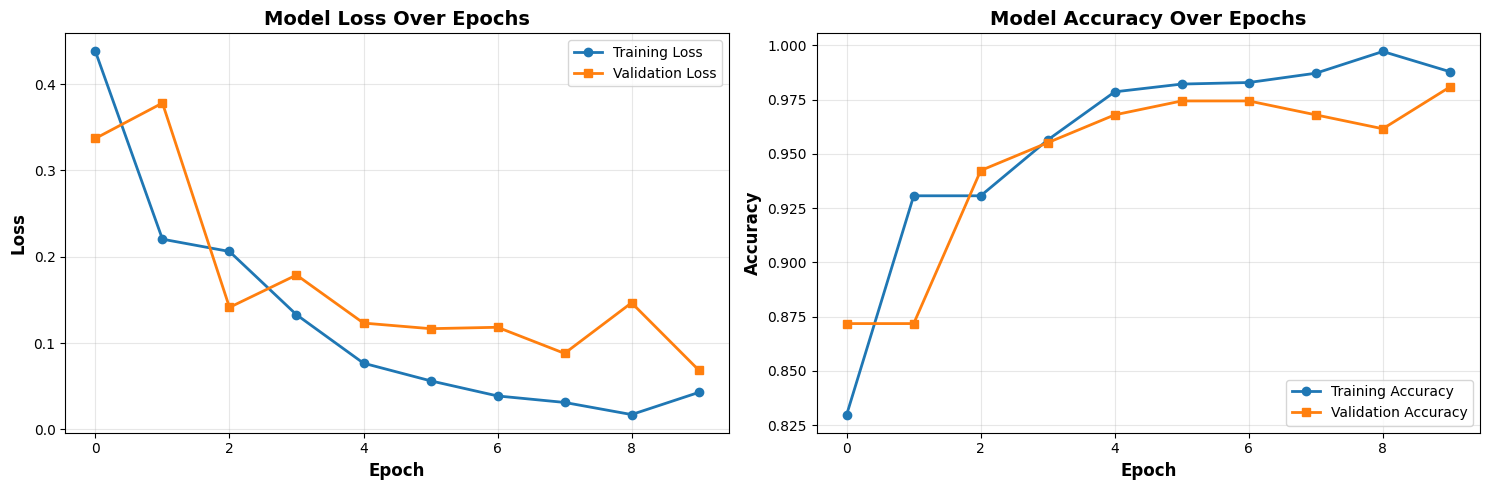


Final Training Metrics:
Training Loss: 0.0429
Validation Loss: 0.0689
Training Accuracy: 0.9878
Validation Accuracy: 0.9808


In [ ]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Loss
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2, marker='o')
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, marker='s')
axes[0].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot Accuracy
axes[1].plot(history.history['acc'], label='Training Accuracy', linewidth=2, marker='o')
axes[1].plot(history.history['val_acc'], label='Validation Accuracy', linewidth=2, marker='s')
axes[1].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[1].legend(loc='lower right', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final metrics
print("\nFinal Training Metrics:")
print(f"{'='*50}")
print(f"Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Training Accuracy: {history.history['acc'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_acc'][-1]:.4f}")
print(f"{'='*50}")

### Training the Model

Training the CNN on the dataset. We use:
- **validation_split=0.1**: 10% of training data used for validation during training
- **epochs=10**: The model will see the entire training dataset 10 times

The `history` object stores training metrics which we'll use for visualization.

## Model Evaluation

**Objective:** Assess the model's performance on unseen test data using multiple metrics.

We will evaluate:
1. **Test Accuracy**: Overall percentage of correct predictions
2. **Confusion Matrix**: Detailed breakdown of correct and incorrect predictions
3. **Classification Report**: Precision, Recall, and F1-Score for each class

These metrics provide a comprehensive understanding of model performance beyond simple accuracy.

### Test Set Accuracy

Evaluating the model on the test set to measure its performance on completely unseen data.

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test accuracy =', accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - acc: 0.9794 - loss: 0.0487
Test accuracy = 0.9794344305992126
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - acc: 0.9794 - loss: 0.0487
Test accuracy = 0.9794344305992126


### Confusion Matrix

A confusion matrix shows:
- **True Positives (TP)**: Correctly predicted "with mask"
- **True Negatives (TN)**: Correctly predicted "without mask"
- **False Positives (FP)**: Incorrectly predicted "with mask"
- **False Negatives (FN)**: Incorrectly predicted "without mask"

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 266ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 266ms/step


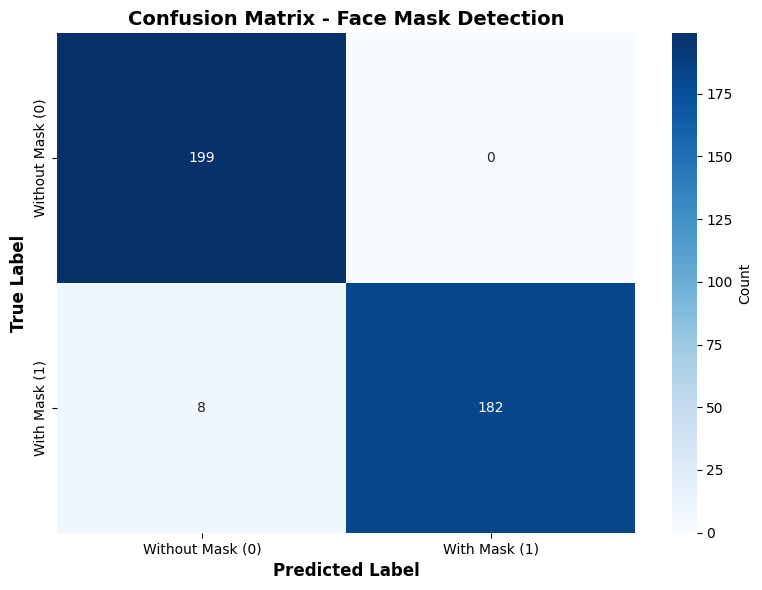


Confusion Matrix:
True Negatives (TN): 199 - Correctly predicted 'Without Mask'
False Positives (FP): 0 - Incorrectly predicted 'With Mask'
False Negatives (FN): 8 - Incorrectly predicted 'Without Mask'
True Positives (TP): 182 - Correctly predicted 'With Mask'


In [ ]:
# Generate predictions on test set
Y_pred = model.predict(X_test_scaled)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Without Mask (0)', 'With Mask (1)'],
            yticklabels=['Without Mask (0)', 'With Mask (1)'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Face Mask Detection', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Print confusion matrix values
print("\nConfusion Matrix:")
print(f"{'='*50}")
print(f"True Negatives (TN): {cm[0, 0]} - Correctly predicted 'Without Mask'")
print(f"False Positives (FP): {cm[0, 1]} - Incorrectly predicted 'With Mask'")
print(f"False Negatives (FN): {cm[1, 0]} - Incorrectly predicted 'Without Mask'")
print(f"True Positives (TP): {cm[1, 1]} - Correctly predicted 'With Mask'")
print(f"{'='*50}")

### Classification Report: Precision, Recall, and F1-Score

**Metrics explained:**
- **Precision**: Of all predictions for a class, how many were correct? (TP / (TP + FP))
- **Recall**: Of all actual instances of a class, how many did we find? (TP / (TP + FN))
- **F1-Score**: Harmonic mean of Precision and Recall (balances both metrics)
- **Support**: Number of actual occurrences of each class in the test set

In [ ]:
# Generate classification report
class_names = ['Without Mask (0)', 'With Mask (1)']
report = classification_report(Y_test, Y_pred_classes, target_names=class_names)

print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(report)
print("="*60)


CLASSIFICATION REPORT
                  precision    recall  f1-score   support

Without Mask (0)       0.96      1.00      0.98       199
   With Mask (1)       1.00      0.96      0.98       190

        accuracy                           0.98       389
       macro avg       0.98      0.98      0.98       389
    weighted avg       0.98      0.98      0.98       389



### Model Performance Interpretation

**Summary of Results:**

The classification report above provides detailed performance metrics for our Face Mask Detection model:

1. **High Precision** means when the model predicts a class, it's usually correct
2. **High Recall** means the model successfully identifies most instances of each class
3. **High F1-Score** indicates a good balance between Precision and Recall
4. **Overall Accuracy** shows the percentage of all predictions that were correct

**Practical Implications:**
- A high recall for "With Mask" is crucial - we want to catch most people wearing masks correctly
- A high precision for "Without Mask" is important - we don't want false alarms
- The confusion matrix helps identify which types of errors the model makes most often

## Predictive System (Inference)

**Objective:** Use the trained model to make predictions on new, unseen images.

**Process:**
1. Load a new image
2. Resize it to 128x128 pixels
3. Normalize pixel values (divide by 255)
4. Reshape to match model input format
5. Make prediction and interpret results

**Note:** For Jupyter notebooks, use `plt.imshow()` instead of `cv2_imshow()` to display images.

### Note: Import Libraries First

**Important:** Before running the prediction cell below, make sure you have executed cell 5 to import all required libraries (cv2, numpy, matplotlib, etc.). 

If you get a "cv2 is not defined" error, go back and run cell 5 first.

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

# Convert BGR to RGB for proper display and prediction
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(input_image_rgb)
plt.axis('off')
plt.title('Input Image', fontsize=14, fontweight='bold')
plt.show()

# Preprocess the image
input_image_resized = cv2.resize(input_image_rgb, (128, 128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# Make prediction
input_prediction = model.predict(input_image_reshaped)
print(f"\nPrediction probabilities: {input_prediction}")

input_pred_label = np.argmax(input_prediction)
print(f"Predicted class: {input_pred_label}")

# Display result
print("\n" + "="*50)
if input_pred_label == 1:
    print('✓ The person in the image is wearing a mask.')
else:
    print('✗ The person in the image is not wearing a mask.')
print("="*50)

NameError: name 'cv2' is not defined

## Loading and Using the Saved Model

**Why load a saved model?**
- Reuse the trained model without retraining (saves time and computational resources)
- Deploy the model in production
- Share the model with others
- Continue predictions in a new session

**Important:** When loading a saved model, you only need to import the necessary libraries. You don't need to retrain or have access to the training data.

### Method 1: Load Model and Predict on a Single Image

✓ Model loaded successfully!


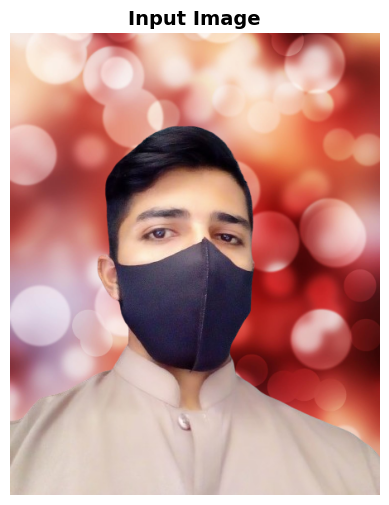

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step

Prediction probabilities: [[0.00962124 0.92592114]]
Predicted class: 1

✓ The person in the image is wearing a mask.


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras

loaded_model = keras.models.load_model('face_mask_detection_model.h5')
print("✓ Model loaded successfully!")
name = input("Enter the name of the image (.png): ")
image_path = f'../test/{name}.png' 
input_image = cv2.imread(image_path)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(input_image_rgb)
plt.axis('off')
plt.title('Input Image', fontsize=14, fontweight='bold')
plt.show()

input_image_resized = cv2.resize(input_image_rgb, (128, 128))
input_image_scaled = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

prediction = loaded_model.predict(input_image_reshaped)
predicted_class = np.argmax(prediction)

print(f"\nPrediction probabilities: {prediction}")
print(f"Predicted class: {predicted_class}")
print("\n" + "="*50)
if predicted_class == 1:
    print('✓ The person in the image is wearing a mask.')
else:
    print('✗ The person in the image is not wearing a mask.')
print("="*50)